# Regresja kwantylowa

## Wyznaczanie 85 percentyla wyników egzaminu

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### 1. Zrozumienie uwarunkowań

Niskie wyniki z egzaminów w ostatnich latach zmusiły naukowców do przestudiowania jak bardzo czas nauki wpływa na końcowy wynik egzaminu, porównując poszczególne percentyle. W tym celu naukowcy zebrali dane od 1000 uczniów i przeprowadzili na nich regresję kwantylową.

### 2. Zrozumienie i przygotowanie danych

Dane zawierają dwie kolumny - godziny spędzone na nauce i wynik z egzaminu. Istnieje 1000 rekordów. Nie ma żadnych niepotrzebnych danych.

In [2]:
hours = np.random.uniform(1, 10, 1000)
score = 60 + 2*hours + np.random.normal(loc=0, scale=.45*hours, size=1000)

In [3]:
df = pd.DataFrame({'hours': hours, 'score': score})

In [4]:
df.head()

,hours,score
0,8.595525,74.056451
1,9.068645,83.840167
2,1.214597,62.275042
3,4.249966,70.107417
4,8.661979,78.653250


### 3. Modelowanie

Zastosowano model regresji kwantylowej, dla kwantyli od 0.05 do 0.95, z różnicami co 0.05.
Dla każdego kwantyla po zastosowaniu modelu wyliczono dwie wartości - a i b, dzięki którym możliwe było późniejsze wyliczenie wartości odpowiednich percentyli ze wzoru a+b\*hours, gdzie hours to liczba godzin spędzonych przy nauce.
Dla przykładu, wartość 80 percentyla dla uczniów przeznaczających 8 godzin na naukę wynosiłaby:
80 percyntyl = 59.920518 + 2.393036 * 8 = 79,065

In [5]:
quantiles = np.arange(.05, .96, .05)

In [6]:
model = smf.quantreg('score ~ hours', df)

In [7]:
def fit_model(q):
    res = model.fit(q=q, max_iter = 10000)
    return [q, res.params['Intercept'], res.params['hours']]

In [8]:
models = [fit_model(x) for x in quantiles]

In [9]:
models = pd.DataFrame(models, columns=['q', 'a', 'b'])

In [10]:
print(models)

       q          a         b
0   0.05  59.944794  1.224530
1   0.10  60.164819  1.341548
2   0.15  60.114002  1.451454
3   0.20  60.048480  1.569488
4   0.25  60.032742  1.643466
5   0.30  59.995034  1.737139
6   0.35  59.973079  1.813209
7   0.40  59.926946  1.905080
8   0.45  59.974382  1.951521
9   0.50  60.014811  1.991099
10  0.55  59.967667  2.067628
11  0.60  60.077880  2.091682
12  0.65  60.093518  2.140372
13  0.70  60.071979  2.214551
14  0.75  60.132918  2.266538
15  0.80  60.135861  2.345957
16  0.85  60.086763  2.425367
17  0.90  59.974612  2.559274
18  0.95  59.931661  2.725618


### 4. Ewaluacja

Wykorzystano model do zwizualizowania wyników poszczególnych percentyli, wyciągając z wykresu odpowiednie wnioski.

In [11]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

In [12]:
cmap = get_cmap(len(models))

Text(0, 0.5, 'Exam Score')

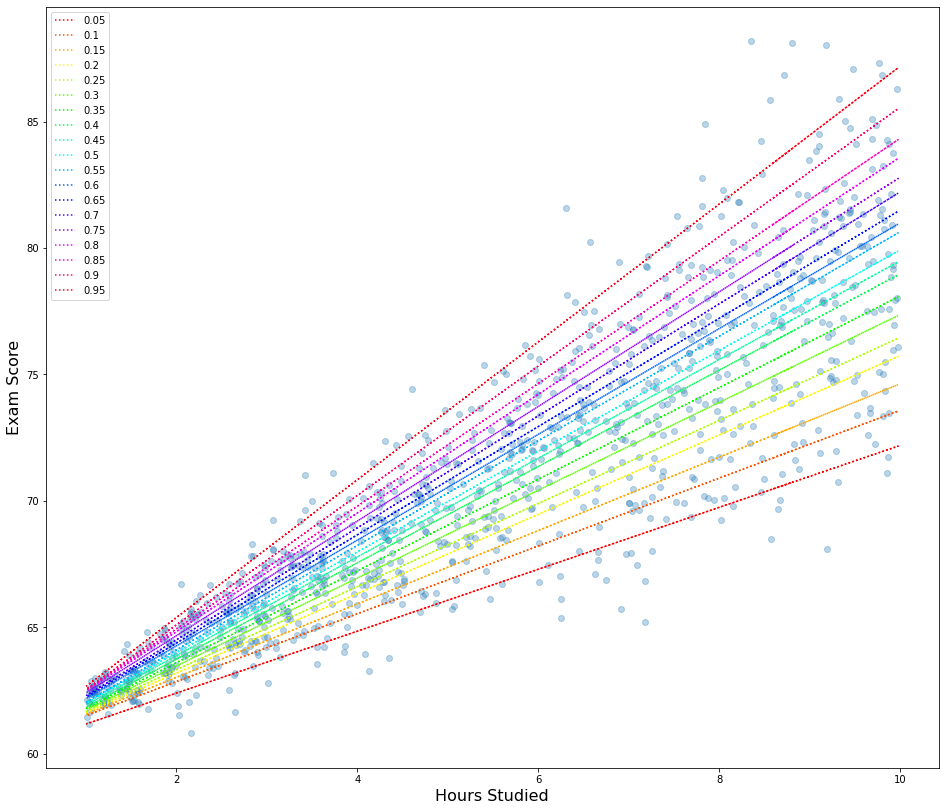

In [13]:
fig, ax = plt.subplots(figsize=(16, 14))

get_y = lambda a, b: a + b * hours
# y = get_y(model.params['Intercept'], model.params['hours'])

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(hours, y, label=round(models.q[i], 2), linestyle='dotted', color=cmap(i))

# ax.plot(hours, y, color='black')
ax.scatter(hours, score, alpha=.3)
legend = ax.legend()
ax.set_xlabel('Hours Studied', fontsize=16)
ax.set_ylabel('Exam Score', fontsize=16)

### 5. Wdrożenie

Wyniki badania zostały wykorzystywane przy planowaniu trudności kolejnych egzaminów, do przewidywania przyszłych perecyntyli oraz do możliwych zmian w systemie nauczania.